# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-16-trescuerpos_regiones_exclusion.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del problema de los tres cuerpos: regiones de exclusión

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [1]:
!pip install -Uq pymcel

In [2]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Las regiones de exclusión

Hagamos un gráfico de cómo varía el tamaño de las regiones de exclusión como función de la constante de Jacobi:

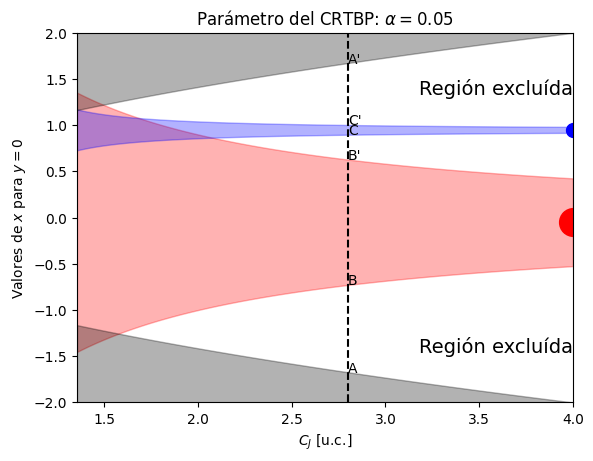

In [4]:
alfa=0.05
Cmin=1.5*(1-alfa)**2
Cmax=4
xmin=-2
xmax=+2

from numpy import linspace
CJs=linspace(Cmax,Cmin,100)

#Radio de las zonas de exclusión
from numpy import sqrt
R=sqrt(CJs)
R1=2*(1-alfa)/CJs
R2=2*alfa/(CJs-(1-alfa)**2)

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Zonas permitidas
ax.fill_between(CJs,R1-alfa,-R1-alfa,color='r',alpha=0.3)
ax.fill_between(CJs,R2+1-alfa,-R2+1-alfa,color='b',alpha=0.3)
ax.fill_between(CJs,R,xmax,color='k',alpha=0.3)
ax.fill_between(CJs,xmin,-R,color='k',alpha=0.3)
ax.plot(Cmax,1-alfa,'bo',ms=10)
ax.plot(Cmax,-alfa,'ro',ms=20)

CJ0=2.8
ax.axvline(CJ0,color='k',ls='--')
R=sqrt(CJ0)
R1=2*(1-alfa)/CJ0
R2=2*alfa/(CJ0-(1-alfa)**2)
ax.text(CJ0,-R,"A")
ax.text(CJ0,-R1-alfa,"B")
ax.text(CJ0,+R1-alfa,"B'")
ax.text(CJ0,(1-alfa)-R2,"C")
ax.text(CJ0,(1-alfa)+R2,"C'")
ax.text(CJ0,+R,"A'")

#Decoración
ax.set_title(f"Parámetro del CRTBP: $\\alpha={alfa}$")
ax.set_xlabel("$C_J$ [u.c.]")
ax.set_ylabel("Valores de $x$ para $y=0$")
ax.text(4.0,1.4,"Región excluída",ha='right',va='center',fontsize=14)
ax.text(4.0,-1.4,"Región excluída",ha='right',va='center',fontsize=14)
ax.set_ylim((xmin,xmax));
ax.set_xlim((Cmin,Cmax));

Para ilustrar los conceptos de regiones de exclusión, puntos colineales y superficies de cero velocidad, construyamos un sistema físico real, simulemos su trayectoria y comparemos esa trayectoria con la ubicación esperada de estas regiones del espacio.  En el algoritmo a continuación se define el sistema, sus condiciones iniciales y se resuelve numéricamente las ecuaciones de movimiento.

In [6]:
#Propiedades del sistema y condiciones iniciales
alfa=0.3
ro=[0.3,0.0,0.0]
vo=[0.5,0.501,0.0]

#Tiempos de integración
from numpy import linspace
Nt=500
ts=linspace(0,40,Nt)

#Resuelve numéricamente la ecuación de movimiento
from pymcel.export import crtbp_solucion
solucion=crtbp_solucion(alfa,ro,vo,ts)

#Extrae las posiciones y velocidades en el sistema rotante
rs=solucion[0]
vs=solucion[1]

from pymcel.export import constante_jacobi
CJs=constante_jacobi(alfa,rs,vs)
CJ=CJs[0]

print(f"C_J = {CJ}")

C_J = 3.4223323333333333


Vamos a dibujar la trayectoria y las regiones de exclusión para que comparemos:

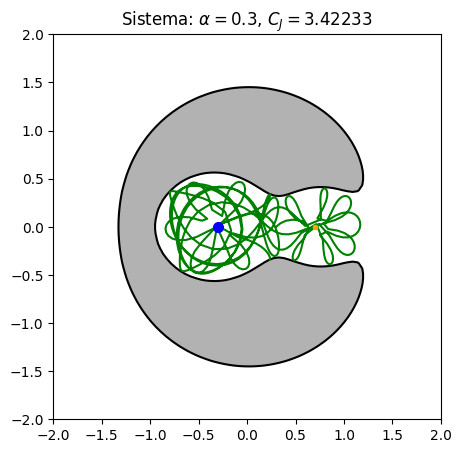

In [7]:
#Tamaño de la malla y número de filas y columnas
rango=2.0
NG=80
#Malla de puntos en el plano
from numpy import meshgrid,linspace,ones_like
X,Y=meshgrid(linspace(-rango,rango,NG),linspace(-rango,rango,NG))
#Valores de v^2
from numpy import sqrt
V2=2*(1-alfa)/sqrt((X+alfa)**2+Y**2)+2*alfa/sqrt((X-1+alfa)**2+Y**2)+X**2+Y**2-CJ

fig=plt.figure(figsize=(5,5))
ax=fig.gca()

#Curva de cero velocidad
ax.contour(X,Y,V2,levels=[0],colors='k')
#c=ax.contour(X,Y,V2,levels=[-3,-2,0,2,3])
#c=ax.contour(X,Y,V2,levels=[0])
#plt.colorbar(c)

#Región de exclusión
ax.contourf(X,Y,V2,levels=[-300,0],colors='k',alpha=0.3)
#c=ax.contourf(X,Y,V2,levels=[-5,0],alpha=0.3)
#plt.colorbar(c)

#Trayectoria
ax.plot(rs[:,0],rs[:,1],color='green')

#Posición de las partículas con masa
ax.plot([-alfa],[0],'o',color='blue',markersize=10*(1-alfa))
ax.plot([1-alfa],[0],'o',color='orange',markersize=max(2,10*alfa))

#Decoración
ax.set_title(f"Sistema: $\\alpha={alfa}$, $C_J={CJ:g}$")
ax.set_xlim((-rango,rango));
ax.set_ylim((-rango,rango));

Hagamos esto mismo pero agregando una opción interactiva:

In [8]:
def regiones_exclusion_dinamica(vox=0.5):
    import matplotlib.pyplot as plt
    plt.close("all")
    #Solución
    alfa=0.2
    ro=[0.4,0.0,0.0]
    vo=[vox,0.4,0.0]
    from numpy import linspace
    Nt=500
    ts=linspace(0,20,Nt)
    from pymcel.export import crtbp_solucion
    solucion=crtbp_solucion(alfa,ro,vo,ts)
    rs=solucion[0]
    vs=solucion[1]    
    #Constante de Jacobi
    from pymcel.export import constante_jacobi
    CJ=constante_jacobi(alfa,rs,vs)[0]
    #Matriz de rapidez
    rango=3*(1-alfa)
    from numpy import meshgrid,linspace,ones_like
    X,Y=meshgrid(linspace(-rango,rango,80),linspace(-rango,rango,80))
    from numpy import sqrt
    V2=2*(1-alfa)/sqrt((X+alfa)**2+Y**2)+2*alfa/sqrt((X-1+alfa)**2+Y**2)+X**2+Y**2-CJ
    #Gráfico
    fig=plt.figure(figsize=(5,5))
    ax=fig.gca()
    ax.contour(X,Y,V2,levels=[0],colors='k')
    ax.contourf(X,Y,V2,levels=[-100,0],colors='k',alpha=0.3)
    ax.plot(rs[:,0],rs[:,1],color='green')
    ax.plot([-alfa],[0],'o',color='blue',markersize=10*(1-alfa))
    ax.plot([1-alfa],[0],'o',color='orange',markersize=max(2,10*alfa))
    ax.set_title(f"Sistema: $\\alpha={alfa}$, $C_J={CJ:g}$")
    ax.set_xlim((-rango,rango));
    ax.set_ylim((-rango,rango));
    del rs,vs,V2,X,Y
    
# Widgets de Jupyter
from ipywidgets import interact,fixed,widgets
opciones=dict(continuous_update=False)

# Código de interacción
interact(regiones_exclusion_dinamica,
         vox=widgets.FloatSlider(min=0.05,max=1.3,step=0.05,value=0.35,**opciones),
        );

interactive(children=(FloatSlider(value=0.35, continuous_update=False, description='vox', max=1.3, min=0.05, s…

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)